# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# load dataset
file_path = '/content/unclean_customer_data.csv'
df = pd.read_csv(file_path)
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.shape

(10200, 6)

In [4]:
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
count,10200.000000,9943.000000,10200.000000,10200.000000,10200.000000,9944.000000
mean,5466.655392,34.458212,50124.610200,50.587613,14.507255,100.190612
std,2591.699853,9.998262,14915.806974,28.628536,8.662804,49.846288
min,1001.000000,0.000000,-17177.834332,1.009234,0.000000,-86.593231
25%,3211.750000,28.000000,40002.275881,26.110644,7.000000,66.144312
50%,5485.000000,34.000000,50091.128413,50.287120,15.000000,100.177920
75%,7708.250000,41.000000,60290.094248,75.637159,22.000000,133.994751
max,9998.000000,69.000000,112218.425755,99.990069,29.000000,273.518342


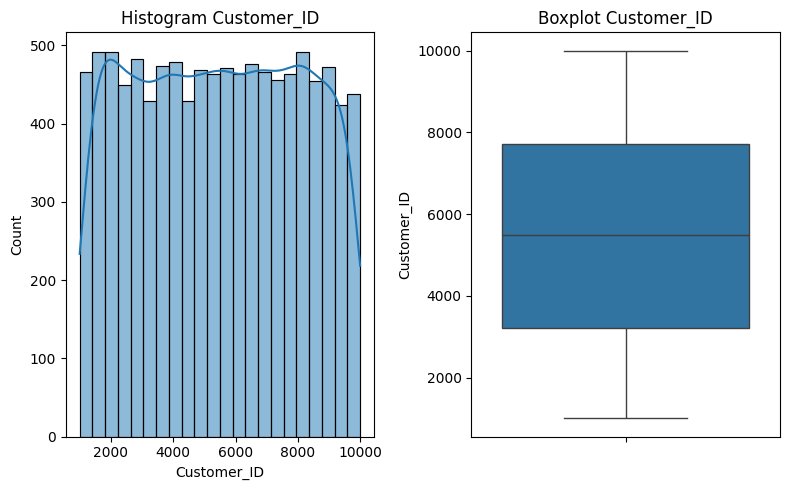

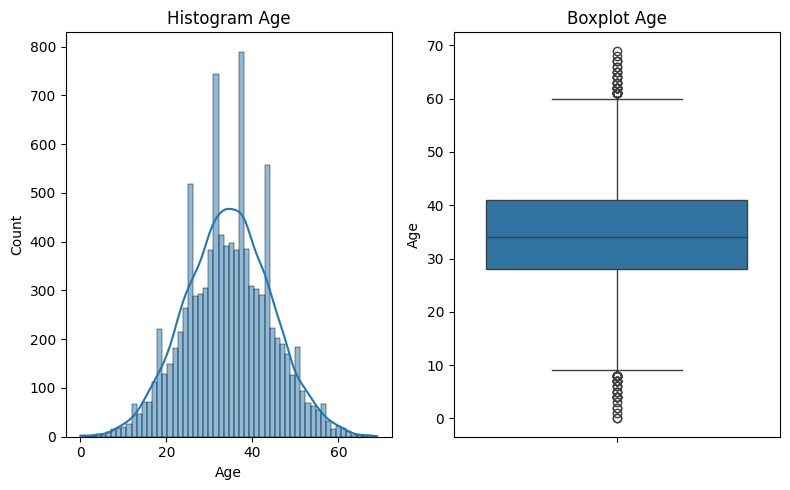

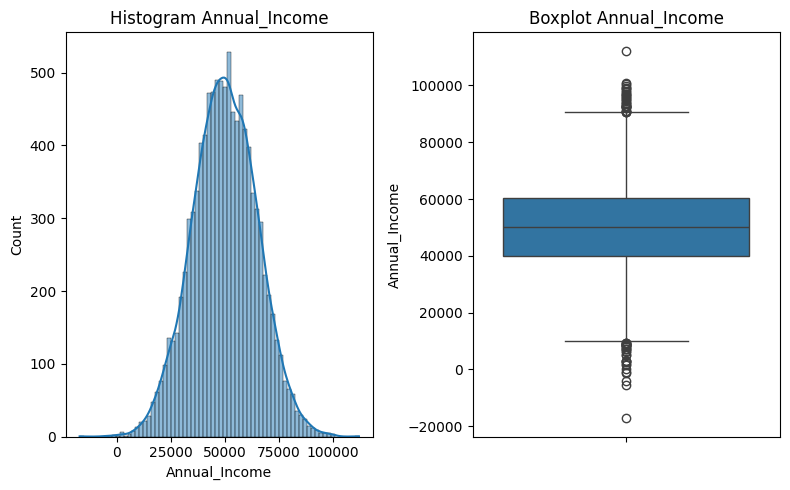

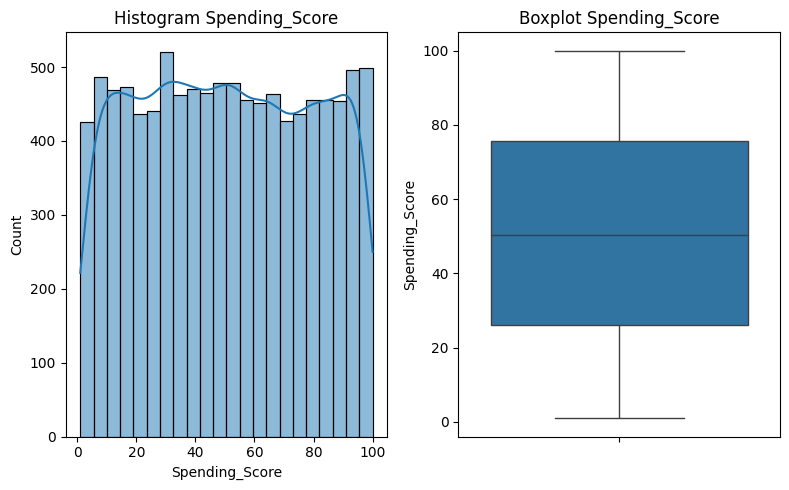

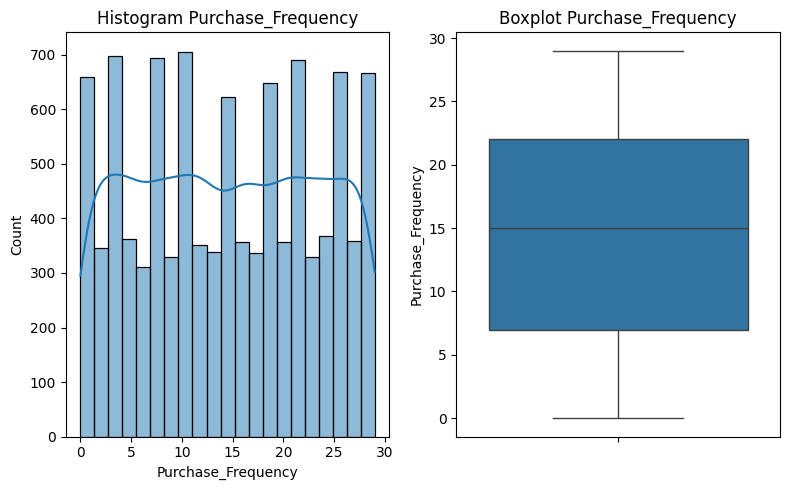

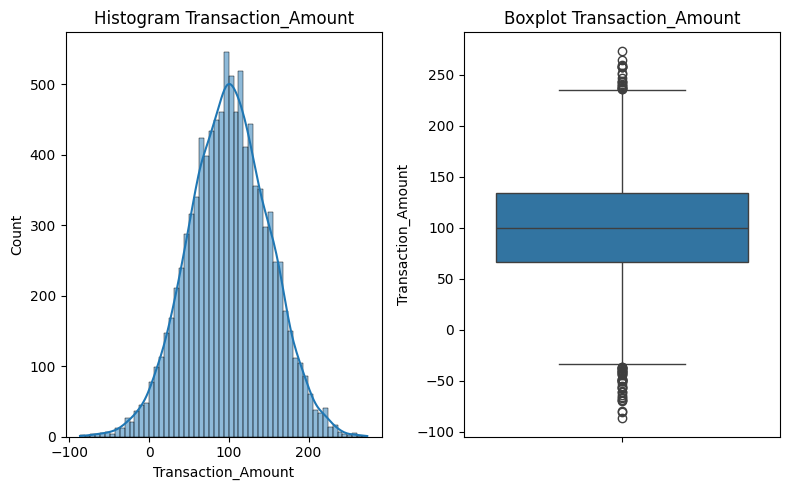

In [5]:
# distribusi variabel
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram {col}')

  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot {col}')

  plt.tight_layout()
  plt.show()

<ipython-input-6-237f0994c553>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-15.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < lower_bound), col] = lower_bound


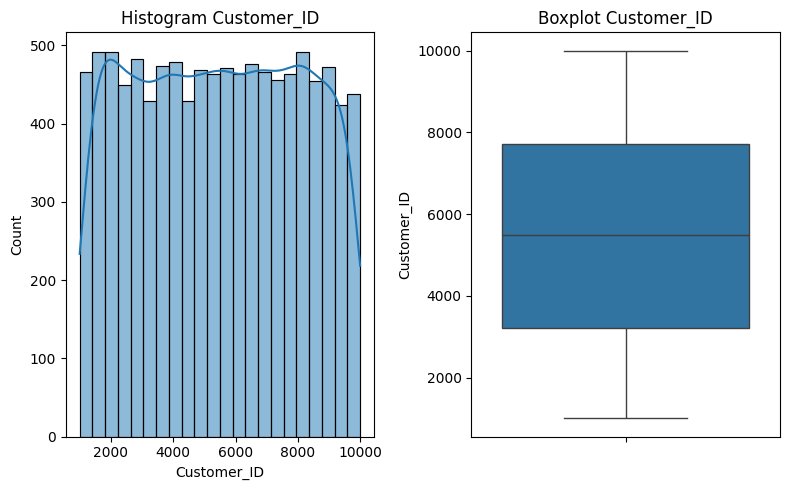

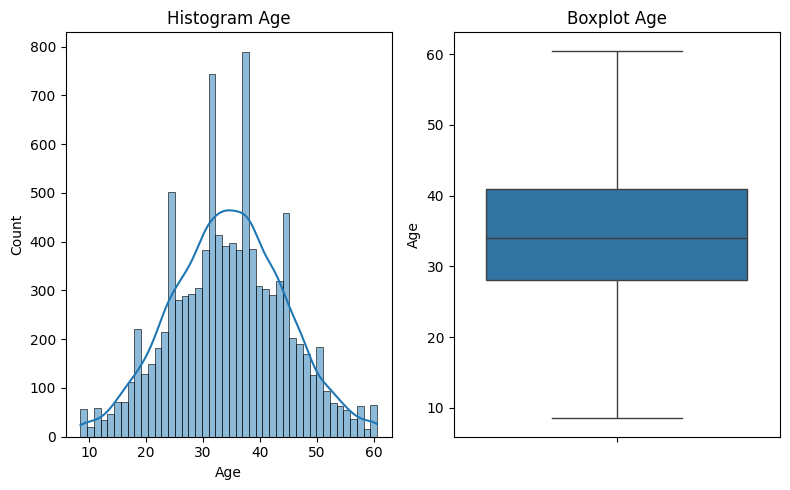

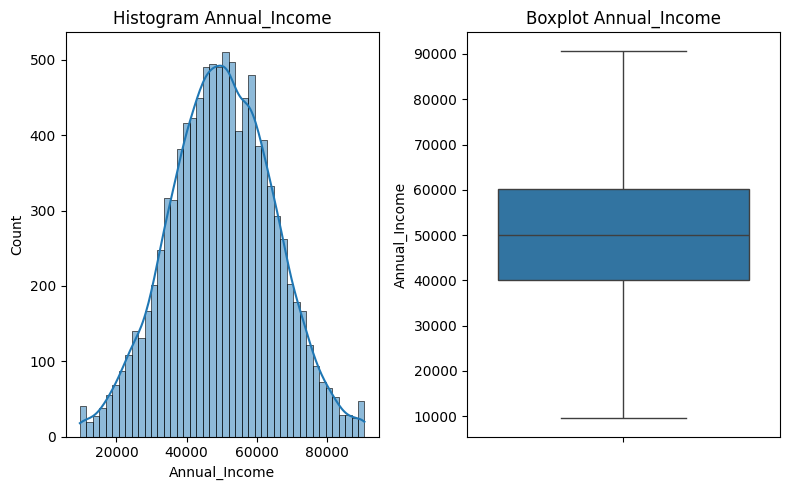

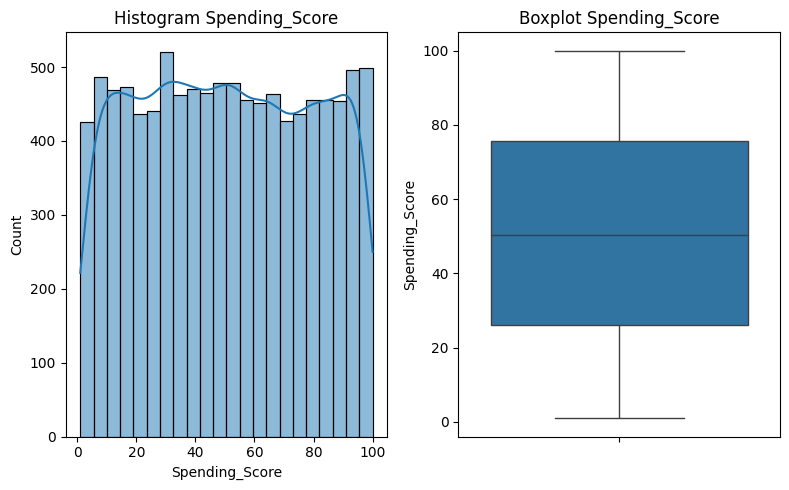

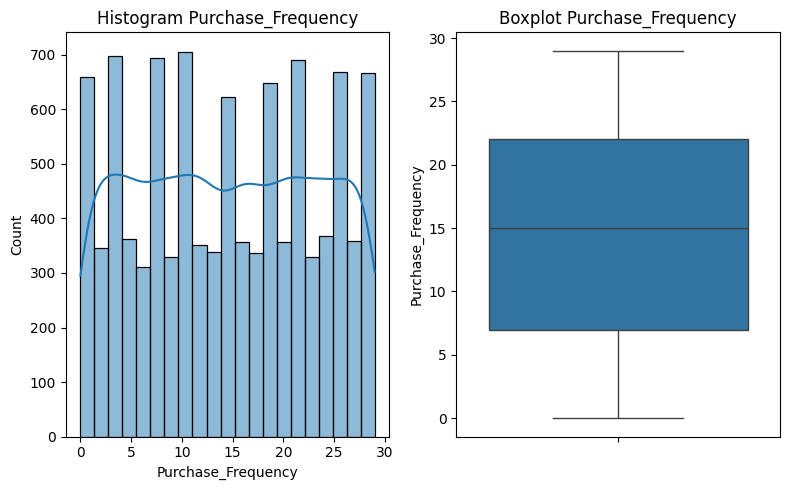

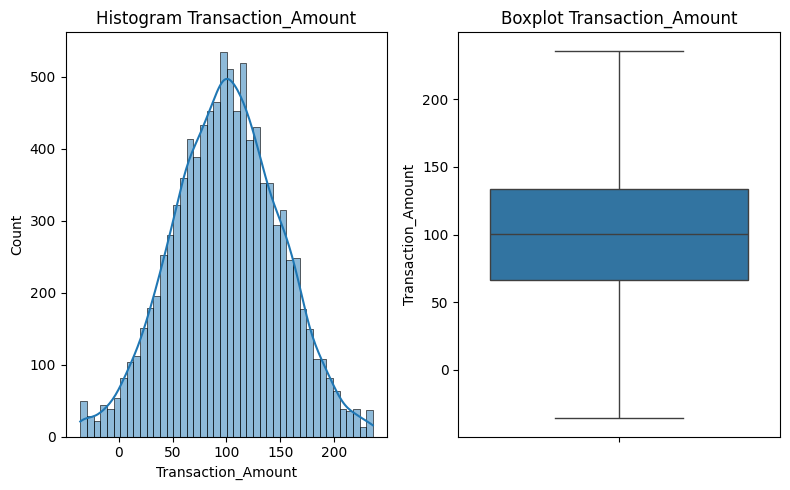

In [6]:
# Mengatasi outlier
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # iIdentifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # ganti nilainya
    df.loc[(df[col] < lower_bound), col] = lower_bound
    df.loc[(df[col] > upper_bound), col] = upper_bound

for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram {col}')

  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot {col}')

  plt.tight_layout()
  plt.show()

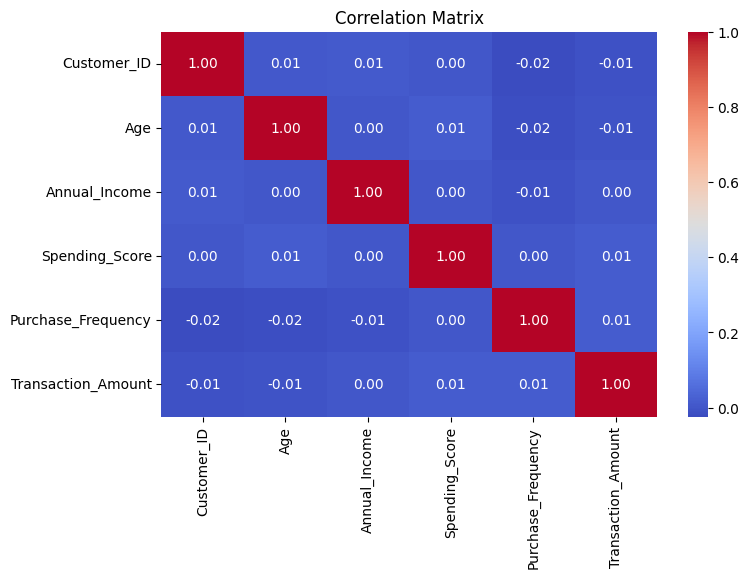

In [7]:
# cek korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [8]:
df.shape

(10200, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         10200 non-null  int64  
 1   Age                 9943 non-null   float64
 2   Annual_Income       10200 non-null  float64
 3   Spending_Score      10200 non-null  float64
 4   Purchase_Frequency  10200 non-null  float64
 5   Transaction_Amount  9944 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 478.3 KB


In [10]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Age,257
Transaction_Amount,256


In [11]:
df.duplicated().sum()

np.int64(200)

In [12]:
df.drop_duplicates()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17.0,129.724190
1,1860,48.0,44460.183764,61.349076,25.0,91.479265
2,6390,17.0,43677.755605,22.589956,9.0,130.573812
3,6191,34.0,48666.812544,82.069525,0.0,72.395846
4,6734,44.0,46080.334029,65.076915,3.0,156.399077
...,...,...,...,...,...,...
9995,1581,36.0,52367.411507,56.135947,8.0,52.485763
9996,4881,39.0,22129.594902,87.490917,10.0,154.563183
9997,4909,40.0,70678.683758,78.373340,2.0,105.550735
9998,2999,34.0,72935.015197,3.219935,28.0,200.391583


In [13]:
# atasi missing value
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Transaction_Amount'].fillna(df['Transaction_Amount'].median(), inplace=True)

<ipython-input-13-90252615b0be>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-13-90252615b0be>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [14]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Annual_Income,0
Spending_Score,0
Purchase_Frequency,0
Transaction_Amount,0


In [15]:
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17.0,129.724190
1,1860,48.0,44460.183764,61.349076,25.0,91.479265
2,6390,17.0,43677.755605,22.589956,9.0,130.573812
3,6191,34.0,48666.812544,82.069525,0.0,72.395846
4,6734,44.0,46080.334029,65.076915,3.0,156.399077


In [16]:
# normalisasi
features = ['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Transaction_Amount']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)
df_scaled.head()

,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,-0.351271,1.736045,0.926277,0.287767,0.602634
1,1.381305,-0.382243,0.375918,1.211301,-0.178730
2,-1.778099,-0.435041,-0.978011,-0.635767,0.619992
3,-0.045523,-0.098380,1.099723,-1.674743,-0.568614
4,0.973640,-0.272916,0.506139,-1.328417,1.147615


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

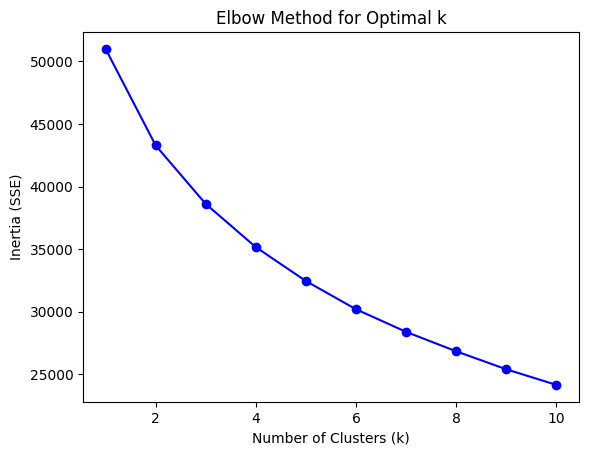

In [17]:
# Menentukan K dengan inersia
X = df_scaled

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

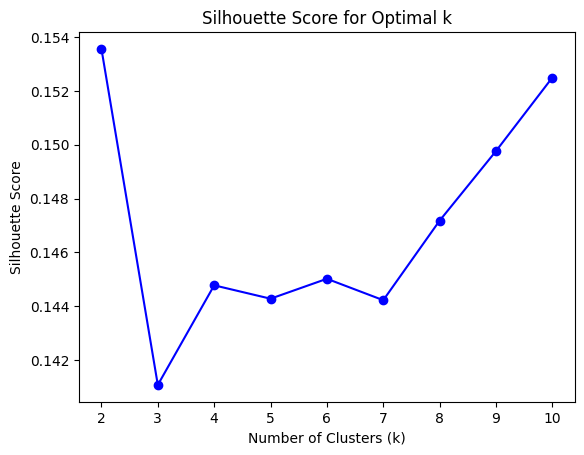

In [18]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [19]:
# clustering
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [20]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

X = df_scaled
y = df['Cluster']

# memilih 3 fitur
selector = SelectKBest(f_classif, k=3)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_features = list(X.columns[selected_feature_indices])
print("Selected Features:", selected_features)

df_selected = df_scaled[selected_features]

kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_Selected'] = kmeans_selected.fit_predict(df_selected)

Selected Features: ['Spending_Score', 'Purchase_Frequency', 'Transaction_Amount']


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

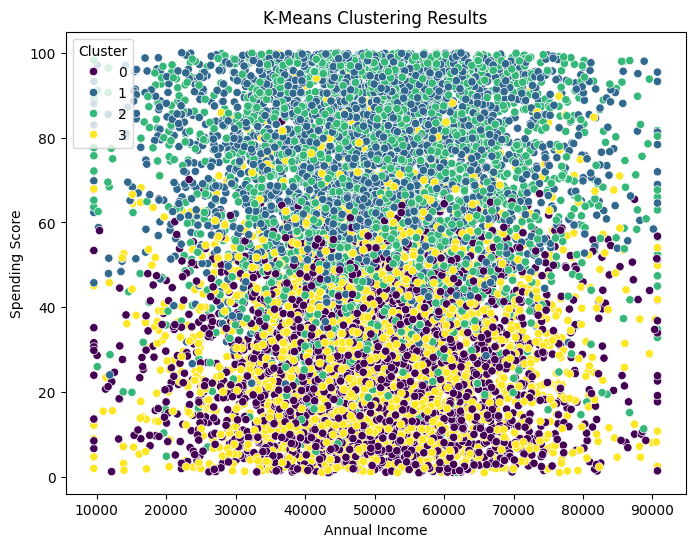

In [21]:
# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

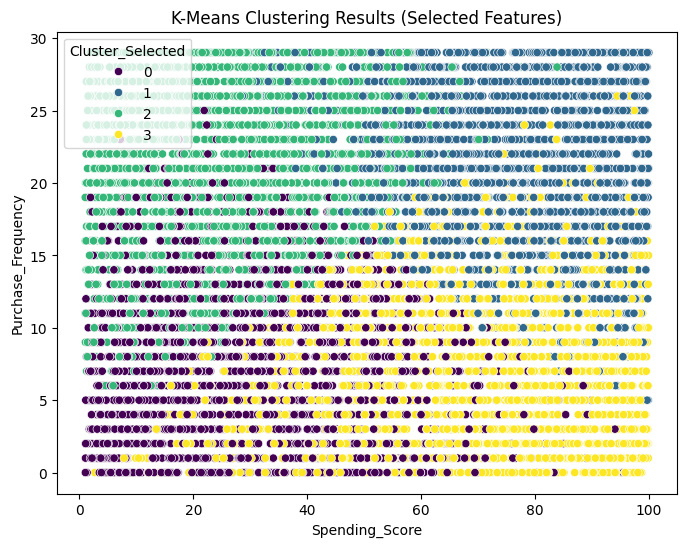

In [22]:
# Visualisasi hasil clustering dengan selected features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='Cluster_Selected', data=df, palette='viridis')
plt.title('K-Means Clustering Results (Selected Features)')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

#### Karena tidak ada proses label encoding atau standarisasi maka inverse transform tidak diperlukan


In [23]:
df[features] = scaler.inverse_transform(df_scaled)
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount,Cluster,Cluster_Selected
0,8270,31.0,75851.592212,77.104268,17.0,129.724190,1,1
1,1860,48.0,44460.183764,61.349076,25.0,91.479265,1,1
2,6390,17.0,43677.755605,22.589956,9.0,130.573812,3,0
3,6191,34.0,48666.812544,82.069525,0.0,72.395846,2,3
4,6734,44.0,46080.334029,65.076915,3.0,156.399077,3,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [24]:
# lihat karakteristik tiap klaster
df.groupby('Cluster').mean()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount,Cluster_Selected
Cluster,,,,,,,
0,5447.318728,33.115549,50132.730505,26.099237,21.226444,78.833906,2.003490
1,5376.850309,34.572145,49027.299180,74.997525,21.298611,122.401448,1.042052
2,5474.826002,36.721720,51065.695550,69.115396,7.544383,67.278990,2.821288
3,5572.109142,33.365485,50297.208932,31.543429,7.578333,133.085174,0.108337


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1. **Cluster 0: Konsumen Rendah Pengeluaran, Tinggi Frekuensi.**
*   Pendapatan rata-rata sekitar 50K.
*   Spending Score rendah (26.1) kemungkinan konsumen lebih hemat atau cenderung berbelanja barang dengan nilai lebih kecil.
* Frekuensi pembelian tinggi (21.2 kali) tetapi jumlah transaksi sedang (78.8) ini berarti Mereka sering berbelanja, tetapi dengan nilai transaksi lebih kecil.

2. **Cluster 1: Konsumen Belanja Aktif & Boros.**
*   Pendapatan sekitar 49K
*   Spending Score sangat tinggi (75) ini menunjukkan kelompok ini sering dan banyak menghabiskan uang saat berbelanja.
*   Frekuensi belanja cukup tinggi (21.3 kali) dengan jumlah transaksi besar (122.4) Ini adalah pelanggan yang aktif dalam berbelanja dan sering membeli barang bernilai tinggi.

3. **Cluster 2: Konsumen Belanja Rendah, Sedikit Frekuensi.**
*   Pendapatan 51K.
*   Spending Score cukup tinggi (69.1) tetapi frekuensi pembelian rendah (7.5 kali).
*   Jumlah transaksi lebih kecil (67.3) mereka mungkin membeli barang mahal tetapi jarang.

4. **Cluster 3: Pembeli Jarang tetapi Transaksi Besar.**
*   Pendpatan sekitar 50K.
*   Spending Score rendah - sedang (31.5) cenderung tidak terlalu aktif dalam berbelanja.
*   Frekuensi belanja rendah (7.6 kali) tetapi jumlah transaksi terbesar (133.1) mereka berbelanja lebih jarang tetapi dalam jumlah yang besar setiap kali transaksi.

**Kesimpulan**
1. Cluster 1 adalah target terbaik untuk strategi pemasaran karena memiliki Spending Score tinggi dan sering berbelanja.
2. Cluster 2 mungkin perlu strategi khusus seperti diskon atau program loyalitas untuk meningkatkan frekuensi belanja.
3. Cluster 3 berpotensi untuk produk mahal dan premium karena mereka jarang belanja tetapi dalam jumlah besar.
4. Cluster 0 cenderung lebih hemat dan mungkin lebih tertarik dengan promo kecil atau diskon berkala.

In [25]:
# lihat karakteristik tiap klaster selected
df.groupby('Cluster_Selected').mean()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount,Cluster
Cluster_Selected,,,,,,,
0,5538.578552,34.386229,50297.185473,31.347747,7.718639,133.165893,2.924416
1,5391.199607,34.509234,49727.609278,75.830931,21.261690,122.227863,1.020825
2,5417.467612,33.917785,50070.680501,26.386763,21.329245,79.225250,0.060943
3,5521.683605,34.991862,50408.949332,69.450222,7.427551,66.709484,1.979357


# Analisis Karakteristik Cluster Selected dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1. Cluster 0: Frekuensi pembelian rendah dan Spending Score rendah.
* Kemungkinan konsumen yang tidak terlalu sering belanja dan juga tidak banyak menghabiskan uang.
2. Cluster 1: Frekuensi pembelian tinggi dan Spending Score tinggi
* Pelanggan yang sangat aktif dan cenderung banyak berbelanja.
3. Cluster 2: Frekuensi pembelian tinggi tetapi Spending Score sedang
* Bisa jadi mereka sering membeli tetapi lebih selektif dalam jumlah uang yang dihabiskan.
4. Cluster 3: Frekuensi pembelian rendah tetapi Spending Score tinggi
* Meskipun jarang belanja, ketika mereka belanja, mereka cenderung mengeluarkan uang dalam jumlah besar.


hasil cluster selected cukup sama dengan hasil sebelumnya dengan persebaran clusternya lebih terlihat

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [26]:
# Simpan hasilnya ke dalam file CSV
df.to_csv('clustering_results.csv', index=False)